## Basic Neural Network in Keras
We will use simple data of mobile price range classifier. The dataset consists of 20 features and we need to predict the price range in which phone lies. These ranges are divided into 4 classes.
<br>
Dataset - https://www.kaggle.com/iabhishekofficial/mobile-price-classification 


In [136]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [137]:


# Dataset import
file_path = r"amazon.csv"
dataset = pd.read_csv(file_path, encoding="iso-8859-1")
dataset.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,â¹399,"â¹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,â¹199,â¹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,â¹199,"â¹1,899",90%,3.9,"7,928",ã Fast Charger& Data Syncã-With built-in s...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,â¹329,â¹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,â¹154,â¹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [138]:


# Load the dataset
file_path = r"amazon.csv"
amazon_df = pd.read_csv(file_path, encoding="iso-8859-1")

# Display the first few rows of the dataset to understand its structure
amazon_df.head()


# Checking for missing values
missing_values = amazon_df.isnull().sum()

# Checking for duplicates
duplicates = amazon_df.duplicated().sum()

missing_values, duplicates


(product_id             0
 product_name           0
 category               0
 discounted_price       0
 actual_price           0
 discount_percentage    0
 rating                 0
 rating_count           2
 about_product          0
 user_id                0
 user_name              0
 review_id              0
 review_title           0
 review_content         0
 img_link               0
 product_link           0
 dtype: int64,
 0)

In [139]:
# Function to convert price and discount percentage columns to numeric
def convert_to_numeric(column):
    return pd.to_numeric(column.str.replace('[^0-9.]', '', regex=True))




In [140]:
# Convert 'discounted_price', 'actual_price', and 'discount_percentage' to numeric
amazon_df['discounted_price'] = convert_to_numeric(amazon_df['discounted_price'])
amazon_df['actual_price'] = convert_to_numeric(amazon_df['actual_price'])
amazon_df['discount_percentage'] = convert_to_numeric(amazon_df['discount_percentage'])



In [141]:
# Replace non-numeric entries in 'rating' with NaN and then convert to numeric
# You can also use 'mean', 'median', or any other statistical measure if you don't want to use NaN
amazon_df['rating'] = pd.to_numeric(amazon_df['rating'], errors='coerce')

# If you want to remove rows with non-numeric 'rating' instead of replacing with NaN
# amazon_df = amazon_df[pd.to_numeric(amazon_df['rating'], errors='coerce').notna()]

# Convert 'rating_count', handling commas and coercing errors
amazon_df['rating_count'] = pd.to_numeric(amazon_df['rating_count'].str.replace(',', ''), errors='coerce')

# Rechecking the data types after conversion
updated_data_types = amazon_df.dtypes

updated_data_types


product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage      int64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object

In [142]:
# Identifying non-numeric entries in the 'rating' column

# Convert 'rating' column to string
amazon_df['rating'] = amazon_df['rating'].astype(str)

# Identifying non-numeric entries in the 'rating' column
non_numeric_ratings = amazon_df[~amazon_df['rating'].str.replace('.', '', regex=True).str.isnumeric()]['rating']

non_numeric_ratings.unique()



array(['nan'], dtype=object)

In [143]:
# Removing rows where 'rating' contains '|'
amazon_df = amazon_df[amazon_df['rating'] != '|']

# Converting 'rating' to numeric
amazon_df['rating'] = pd.to_numeric(amazon_df['rating'], errors='coerce')

# Recheck the data types after conversion
updated_data_types = amazon_df.dtypes

updated_data_types


product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage      int64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object

In [144]:
# Remove rows with any missing values
amazon_df = amazon_df.dropna()

# Check the updated dataset for missing values
updated_missing_values = amazon_df.isnull().sum()
updated_missing_values


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [145]:
amazon_df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928.0,ã Fast Charger& Data Syncã-With built-in s...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [146]:

categories = amazon_df['category'].str.split('|').explode()
unique_categories = categories.unique()


In [147]:
unique_categories

array(['Computers&Accessories', 'Accessories&Peripherals',
       'Cables&Accessories', 'Cables', 'USBCables', 'NetworkingDevices',
       'NetworkAdapters', 'WirelessUSBAdapters', 'Electronics',
       'HomeTheater,TV&Video', 'Accessories', 'HDMICables', 'Televisions',
       'SmartTelevisions', 'RemoteControls', 'StandardTelevisions',
       'TVMounts,Stands&Turntables', 'TVWall&CeilingMounts', 'RCACables',
       'HomeAudio', 'SpeakerAccessories', 'Mounts', 'OpticalCables',
       'Projectors', 'Adapters', 'SatelliteEquipment',
       'SatelliteReceivers', 'DVICables', 'SpeakerCables',
       'MediaStreamingDevices', 'StreamingClients',
       'AVReceivers&Amplifiers', 'Speakers', 'TowerSpeakers', '3DGlasses',
       'WearableTechnology', 'SmartWatches', 'Mobiles&Accessories',
       'MobileAccessories', 'Chargers', 'PowerBanks',
       'Smartphones&BasicMobiles', 'Smartphones', 'MemoryCards',
       'MicroSD', 'BasicMobiles', 'Headphones,Earbuds&Accessories',
       'Headphones', '

In [148]:
number_of_categories = len(unique_categories)
print(number_of_categories)


317


In [149]:
one_hot_encoded_data = amazon_df['category'].str.get_dummies(sep='|')
one_hot_encoded_data

,3DGlasses,AVReceivers&Amplifiers,Accessories,Accessories&Peripherals,Adapters,Adapters&Multi-Outlets,AirConditioners,AirFryers,AirPurifiers,AirPurifiers&Ionizers,...,WearableTechnology,Webcams,Webcams&VoIPEquipment,WeighingScales,Wet-DryVacuums,WetGrinders,WireboundNotebooks,WirelessUSBAdapters,WoodenPencils,YogurtMakers
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
amazon_df = amazon_df.join(one_hot_encoded_data)

# 刪除原始的 'category' 列
amazon_df.drop('category', axis=1, inplace=True)

In [151]:
amazon_df

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,...,WearableTechnology,Webcams,Webcams&VoIPEquipment,WeighingScales,Wet-DryVacuums,WetGrinders,WireboundNotebooks,WirelessUSBAdapters,WoodenPencils,YogurtMakers
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...",...,0,0,0,0,0,0,0,0,0,0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...",...,0,0,0,0,0,0,0,0,0,0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,90,3.9,7928.0,ã Fast Charger& Data Syncã-With built-in s...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...",...,0,0,0,0,0,0,0,0,0,0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...",...,0,0,0,0,0,0,0,0,0,0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379.0,919.0,59,4.0,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...",...,0,0,0,0,0,0,0,0,0,0
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,2280.0,3045.0,25,4.1,4118.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...",...,0,0,0,0,0,0,0,0,0,0
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,2219.0,3080.0,28,3.6,468.0,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...",...,0,0,0,0,0,0,0,0,0,0
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,1399.0,1890.0,26,4.0,8031.0,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...",...,0,0,0,0,0,0,0,0,0,0


In [152]:
# amazon_df['user_id'] = amazon_df['user_id'].astype('category')
amazon_df['product_id'] = amazon_df['product_id'].astype('category')



# amazon_df['user_id'] = amazon_df['user_id'].cat.codes
amazon_df['product_id'] = amazon_df['product_id'].cat.codes
amazon_df

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,...,WearableTechnology,Webcams,Webcams&VoIPEquipment,WeighingScales,Wet-DryVacuums,WetGrinders,WireboundNotebooks,WirelessUSBAdapters,WoodenPencils,YogurtMakers
0,346,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,622,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...",...,0,0,0,0,0,0,0,0,0,0
1,847,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...",87,"ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...",...,0,0,0,0,0,0,0,0,0,0
2,818,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,90,3.9,7928.0,ã Fast Charger& Data Syncã-With built-in s...,846,"Kunal,Himanshu,viswanath,sai niharka,saqib mal...",...,0,0,0,0,0,0,0,0,0,0
3,643,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,253,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...",...,0,0,0,0,0,0,0,0,0,0
4,588,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,17,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,672,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379.0,919.0,59,4.0,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,1047,"Prabha ds,Raghuram bk,Real Deal,Amazon Custome...",...,0,0,0,0,0,0,0,0,0,0
1461,201,Prestige Delight PRWO Electric Rice Cooker (1 ...,2280.0,3045.0,25,4.1,4118.0,"230 Volts, 400 watts, 1 Year",424,"Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...",...,0,0,0,0,0,0,0,0,0,0
1462,27,Bajaj Majesty RX10 2000 Watts Heat Convector R...,2219.0,3080.0,28,3.6,468.0,International design and styling|Two heat sett...,862,"Nehal Desai,Danish Parwez,Amazon Customer,Amaz...",...,0,0,0,0,0,0,0,0,0,0
1463,61,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,1399.0,1890.0,26,4.0,8031.0,Fan sweep area: 230 MM ; Noise level: (40 - 45...,299,"Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...",...,0,0,0,0,0,0,0,0,0,0


In [153]:
amazon_df.drop('user_id', axis=1, inplace=True)
amazon_df.drop('product_name', axis=1, inplace=True)
amazon_df.drop('user_name', axis=1, inplace=True)
amazon_df

,product_id,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,review_id,review_title,...,WearableTechnology,Webcams,Webcams&VoIPEquipment,WeighingScales,Wet-DryVacuums,WetGrinders,WireboundNotebooks,WirelessUSBAdapters,WoodenPencils,YogurtMakers
0,346,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,622,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",...,0,0,0,0,0,0,0,0,0,0
1,847,199.0,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...",87,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",...,0,0,0,0,0,0,0,0,0,0
2,818,199.0,1899.0,90,3.9,7928.0,ã Fast Charger& Data Syncã-With built-in s...,846,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...",...,0,0,0,0,0,0,0,0,0,0
3,643,329.0,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,253,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...",...,0,0,0,0,0,0,0,0,0,0
4,588,154.0,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,17,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,672,379.0,919.0,59,4.0,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,1047,"R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...",...,0,0,0,0,0,0,0,0,0,0
1461,201,2280.0,3045.0,25,4.1,4118.0,"230 Volts, 400 watts, 1 Year",424,"R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...",...,0,0,0,0,0,0,0,0,0,0
1462,27,2219.0,3080.0,28,3.6,468.0,International design and styling|Two heat sett...,862,"R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...",...,0,0,0,0,0,0,0,0,0,0
1463,61,1399.0,1890.0,26,4.0,8031.0,Fan sweep area: 230 MM ; Noise level: (40 - 45...,299,"R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...","Fan Speed is slow,Good quality,Good product,go...",...,0,0,0,0,0,0,0,0,0,0


In [154]:
amazon_df.drop('about_product', axis=1, inplace=True)
amazon_df.drop('review_id', axis=1, inplace=True)

amazon_df

,product_id,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,review_id,review_title,review_content,...,WearableTechnology,Webcams,Webcams&VoIPEquipment,WeighingScales,Wet-DryVacuums,WetGrinders,WireboundNotebooks,WirelessUSBAdapters,WoodenPencils,YogurtMakers
0,346,399.0,1099.0,64,4.2,24269.0,622,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,...,0,0,0,0,0,0,0,0,0,0
1,847,199.0,349.0,43,4.0,43994.0,87,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,...,0,0,0,0,0,0,0,0,0,0
2,818,199.0,1899.0,90,3.9,7928.0,846,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",...,0,0,0,0,0,0,0,0,0,0
3,643,329.0,699.0,53,4.2,94363.0,253,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",...,0,0,0,0,0,0,0,0,0,0
4,588,154.0,399.0,61,4.2,16905.0,17,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,672,379.0,919.0,59,4.0,1090.0,1047,"R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",...,0,0,0,0,0,0,0,0,0,0
1461,201,2280.0,3045.0,25,4.1,4118.0,424,"R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",...,0,0,0,0,0,0,0,0,0,0
1462,27,2219.0,3080.0,28,3.6,468.0,862,"R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",...,0,0,0,0,0,0,0,0,0,0
1463,61,1399.0,1890.0,26,4.0,8031.0,299,"R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,...,0,0,0,0,0,0,0,0,0,0


In [156]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to apply sentiment analysis
def get_sentiment(text):
    # Ensure text is a string
    text = str(text)
    return sia.polarity_scores(text)['compound']

# Apply the sentiment analysis function to the text data column
# Replace 'review_content' with your actual text data column name
amazon_df['sentiment'] = amazon_df['review_content'].apply(get_sentiment)
amazon_df

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,product_id,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,review_id,review_title,review_content,...,Webcams,Webcams&VoIPEquipment,WeighingScales,Wet-DryVacuums,WetGrinders,WireboundNotebooks,WirelessUSBAdapters,WoodenPencils,YogurtMakers,sentiment
0,346,399.0,1099.0,64,4.2,24269.0,622,816,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,...,0,0,0,0,0,0,0,0,0,0.9033
1,847,199.0,349.0,43,4.0,43994.0,87,1024,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,...,0,0,0,0,0,0,0,0,0,0.9853
2,818,199.0,1899.0,90,3.9,7928.0,846,826,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",...,0,0,0,0,0,0,0,0,0,0.6808
3,643,329.0,699.0,53,4.2,94363.0,253,785,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",...,0,0,0,0,0,0,0,0,0,0.8316
4,588,154.0,399.0,61,4.2,16905.0,17,114,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",...,0,0,0,0,0,0,0,0,0,0.9809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,672,379.0,919.0,59,4.0,1090.0,1047,803,"Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",...,0,0,0,0,0,0,0,0,0,0.9468
1461,201,2280.0,3045.0,25,4.1,4118.0,424,778,"ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",...,0,0,0,0,0,0,0,0,0,0.7876
1462,27,2219.0,3080.0,28,3.6,468.0,862,288,"very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",...,0,0,0,0,0,0,0,0,0,0.9698
1463,61,1399.0,1890.0,26,4.0,8031.0,299,748,"Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,...,0,0,0,0,0,0,0,0,0,-0.2960


In [157]:
amazon_df.drop('review_content', axis=1, inplace=True)
amazon_df

,product_id,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,review_id,review_title,img_link,...,Webcams,Webcams&VoIPEquipment,WeighingScales,Wet-DryVacuums,WetGrinders,WireboundNotebooks,WirelessUSBAdapters,WoodenPencils,YogurtMakers,sentiment
0,346,399.0,1099.0,64,4.2,24269.0,622,816,"Satisfied,Charging is really fast,Value for mo...",https://m.media-amazon.com/images/W/WEBP_40237...,...,0,0,0,0,0,0,0,0,0,0.9033
1,847,199.0,349.0,43,4.0,43994.0,87,1024,"A Good Braided Cable for Your Type C Device,Go...",https://m.media-amazon.com/images/W/WEBP_40237...,...,0,0,0,0,0,0,0,0,0,0.9853
2,818,199.0,1899.0,90,3.9,7928.0,846,826,"Good speed for earlier versions,Good Product,W...",https://m.media-amazon.com/images/W/WEBP_40237...,...,0,0,0,0,0,0,0,0,0,0.6808
3,643,329.0,699.0,53,4.2,94363.0,253,785,"Good product,Good one,Nice,Really nice product...",https://m.media-amazon.com/images/I/41V5FtEWPk...,...,0,0,0,0,0,0,0,0,0,0.8316
4,588,154.0,399.0,61,4.2,16905.0,17,114,"As good as original,Decent,Good one for second...",https://m.media-amazon.com/images/W/WEBP_40237...,...,0,0,0,0,0,0,0,0,0,0.9809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,672,379.0,919.0,59,4.0,1090.0,1047,803,"Received the product without spanner,Excellent...",https://m.media-amazon.com/images/I/41fDdRtjfx...,...,0,0,0,0,0,0,0,0,0,0.9468
1461,201,2280.0,3045.0,25,4.1,4118.0,424,778,"ok,everything was good couldn't return bcoz I ...",https://m.media-amazon.com/images/I/41gzDxk4+k...,...,0,0,0,0,0,0,0,0,0,0.7876
1462,27,2219.0,3080.0,28,3.6,468.0,862,288,"very good,Work but front melt after 2 month,Go...",https://m.media-amazon.com/images/W/WEBP_40237...,...,0,0,0,0,0,0,0,0,0,0.9698
1463,61,1399.0,1890.0,26,4.0,8031.0,299,748,"Fan Speed is slow,Good quality,Good product,go...",https://m.media-amazon.com/images/W/WEBP_40237...,...,0,0,0,0,0,0,0,0,0,-0.2960


In [158]:
amazon_df.drop('review_title', axis=1, inplace=True)
amazon_df

,product_id,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,review_id,img_link,product_link,...,Webcams,Webcams&VoIPEquipment,WeighingScales,Wet-DryVacuums,WetGrinders,WireboundNotebooks,WirelessUSBAdapters,WoodenPencils,YogurtMakers,sentiment
0,346,399.0,1099.0,64,4.2,24269.0,622,816,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,...,0,0,0,0,0,0,0,0,0,0.9033
1,847,199.0,349.0,43,4.0,43994.0,87,1024,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,...,0,0,0,0,0,0,0,0,0,0.9853
2,818,199.0,1899.0,90,3.9,7928.0,846,826,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,...,0,0,0,0,0,0,0,0,0,0.6808
3,643,329.0,699.0,53,4.2,94363.0,253,785,https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,...,0,0,0,0,0,0,0,0,0,0.8316
4,588,154.0,399.0,61,4.2,16905.0,17,114,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,...,0,0,0,0,0,0,0,0,0,0.9809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,672,379.0,919.0,59,4.0,1090.0,1047,803,https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,...,0,0,0,0,0,0,0,0,0,0.9468
1461,201,2280.0,3045.0,25,4.1,4118.0,424,778,https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...,...,0,0,0,0,0,0,0,0,0,0.7876
1462,27,2219.0,3080.0,28,3.6,468.0,862,288,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...,...,0,0,0,0,0,0,0,0,0,0.9698
1463,61,1399.0,1890.0,26,4.0,8031.0,299,748,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...,...,0,0,0,0,0,0,0,0,0,-0.2960


In [159]:
amazon_df.drop('img_link', axis=1, inplace=True)
amazon_df.drop('product_link', axis=1, inplace=True)
amazon_df

,product_id,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,review_id,3DGlasses,AVReceivers&Amplifiers,...,Webcams,Webcams&VoIPEquipment,WeighingScales,Wet-DryVacuums,WetGrinders,WireboundNotebooks,WirelessUSBAdapters,WoodenPencils,YogurtMakers,sentiment
0,346,399.0,1099.0,64,4.2,24269.0,622,816,0,0,...,0,0,0,0,0,0,0,0,0,0.9033
1,847,199.0,349.0,43,4.0,43994.0,87,1024,0,0,...,0,0,0,0,0,0,0,0,0,0.9853
2,818,199.0,1899.0,90,3.9,7928.0,846,826,0,0,...,0,0,0,0,0,0,0,0,0,0.6808
3,643,329.0,699.0,53,4.2,94363.0,253,785,0,0,...,0,0,0,0,0,0,0,0,0,0.8316
4,588,154.0,399.0,61,4.2,16905.0,17,114,0,0,...,0,0,0,0,0,0,0,0,0,0.9809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,672,379.0,919.0,59,4.0,1090.0,1047,803,0,0,...,0,0,0,0,0,0,0,0,0,0.9468
1461,201,2280.0,3045.0,25,4.1,4118.0,424,778,0,0,...,0,0,0,0,0,0,0,0,0,0.7876
1462,27,2219.0,3080.0,28,3.6,468.0,862,288,0,0,...,0,0,0,0,0,0,0,0,0,0.9698
1463,61,1399.0,1890.0,26,4.0,8031.0,299,748,0,0,...,0,0,0,0,0,0,0,0,0,-0.2960


In [160]:

X = amazon_df.drop(columns=["rating","rating_count"]).values

y =  amazon_df[["rating","rating_count"]].values

In [161]:
 amazon_df[["rating","rating_count"]]

,rating,rating_count
0,4.2,24269.0
1,4.0,43994.0
2,3.9,7928.0
3,4.2,94363.0
4,4.2,16905.0
...,...,...
1460,4.0,1090.0
1461,4.1,4118.0
1462,3.6,468.0
1463,4.0,8031.0


In [162]:
y

array([[4.2000e+00, 2.4269e+04],
       [4.0000e+00, 4.3994e+04],
       [3.9000e+00, 7.9280e+03],
       ...,
       [3.6000e+00, 4.6800e+02],
       [4.0000e+00, 8.0310e+03],
       [4.3000e+00, 6.9870e+03]])

In [163]:
X

array([[ 3.460e+02,  3.990e+02,  1.099e+03, ...,  0.000e+00,  0.000e+00,
         9.033e-01],
       [ 8.470e+02,  1.990e+02,  3.490e+02, ...,  0.000e+00,  0.000e+00,
         9.853e-01],
       [ 8.180e+02,  1.990e+02,  1.899e+03, ...,  0.000e+00,  0.000e+00,
         6.808e-01],
       ...,
       [ 2.700e+01,  2.219e+03,  3.080e+03, ...,  0.000e+00,  0.000e+00,
         9.698e-01],
       [ 6.100e+01,  1.399e+03,  1.890e+03, ...,  0.000e+00,  0.000e+00,
        -2.960e-01],
       [ 1.340e+02,  2.863e+03,  3.690e+03, ...,  0.000e+00,  0.000e+00,
         9.915e-01]])

In [164]:
len(X[0])

324

In [165]:
len(y[0])

2

In [166]:


# Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print('Normalized data:')
print(X[0])

# One hot encode
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# y = ohe.fit_transform(y).toarray()
# print('One hot encoded array:')
# print(y[0:5])

# Train test split of model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 0)

Normalized data:
[-0.85885971 -0.39305049 -0.40016451  0.75568113  0.07302295  0.67232111
 -0.02616224 -0.02616224 -0.28663803  1.69042    -0.05858079 -0.02616224
 -0.02616224 -0.05858079 -0.05237828 -0.02616224 -0.02616224 -0.06936135
 -0.04534537 -0.05858079 -0.02616224 -0.06419407 -0.03701166 -0.02616224
 -0.05237828 -0.07870249 -0.02616224 -0.02616224 -0.03701166 -0.02616224
 -0.06419407 -0.03701166 -0.04534537  2.12531907  2.26778684 -0.03701166
 -0.02616224 -0.05237828 -0.04534537 -0.10519034 -0.05237828 -0.02616224
 -0.02616224 -0.04534537 -0.05237828 -0.08706882 -0.15196405 -0.02616224
 -0.02616224 -0.02616224 -0.10181491 -0.02616224 -0.04534537 -0.02616224
 -0.02616224 -0.02616224 -0.02616224 -0.02616224 -0.05858079 -0.06936135
  1.49722582 -0.03701166 -0.03701166 -0.02616224 -0.02616224 -0.04534537
 -0.06936135 -0.02616224 -0.02616224 -0.05858079 -0.02616224 -0.09097177
 -0.03701166 -0.06936135 -0.05858079 -0.02616224 -0.03701166 -0.03701166
 -0.05858079 -0.12918919 -0.037011

In [167]:
import tensorflow as tf


In [168]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [169]:

model = Sequential()
model.add(Dense(len(X[0]), input_dim=324, activation='relu'))  # Adjusted input_dim to match data shape
model.add(Dense(len(X[0])/2, activation='relu'))
model.add(Dense(len(X[0])/2, activation='relu'))
model.add(Dense(len(X[0])/2, activation='relu'))
model.add(Dense(len(X[0])/2, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.add(Dense(2, activation='softmax'))
model.add(Dense(2, activation='softmax'))

In [170]:
# To visualize neural network
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 324)               105300    
                                                                 
 dense_17 (Dense)            (None, 162)               52650     
                                                                 
 dense_18 (Dense)            (None, 162)               26406     
                                                                 
 dense_19 (Dense)            (None, 162)               26406     
                                                                 
 dense_20 (Dense)            (None, 162)               26406     
                                                                 
 dense_21 (Dense)            (None, 2)                 326       
                                                                 
 dense_22 (Dense)            (None, 2)                

In [171]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [172]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
21/21 [==============================] - 1s 2ms/step - loss: 9143.5918 - accuracy: 0.9977
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 8756.7969 - accuracy: 0.9977
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 8597.7578 - accuracy: 0.9977
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 8436.6104 - accuracy: 0.9977
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 8290.4219 - accuracy: 0.9977
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 8153.8564 - accuracy: 0.9977
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 8028.6450 - accuracy: 0.9977
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 7909.9902 - accuracy: 0.9977
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 7806.5146 - accuracy: 0.9977
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 7702.310

In [173]:
y_pred = model.predict(X_test)

# Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

5/5 [==============================] - 0s 1ms/step


In [174]:
# Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [175]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred, test)
print('Accuracy is:', a*100)

Accuracy is: 100.0


In [176]:
# Using test data as validation data
history1 = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
21/21 [==============================] - 0s 8ms/step - loss: 6802.2646 - accuracy: 0.9977 - val_loss: 6867.5400 - val_accuracy: 1.0000
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 6807.5171 - accuracy: 0.9977 - val_loss: 6875.6631 - val_accuracy: 1.0000
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 6812.7842 - accuracy: 0.9977 - val_loss: 6877.6807 - val_accuracy: 1.0000
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 6815.6372 - accuracy: 0.9977 - val_loss: 6882.7671 - val_accuracy: 1.0000
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 6823.9028 - accuracy: 0.9977 - val_loss: 6892.5015 - val_accuracy: 1.0000
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 6832.9087 - accuracy: 0.9977 - val_loss: 6899.7451 - val_accuracy: 1.0000
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 6844.2056 - accuracy: 0.9977 - val_loss: 6914

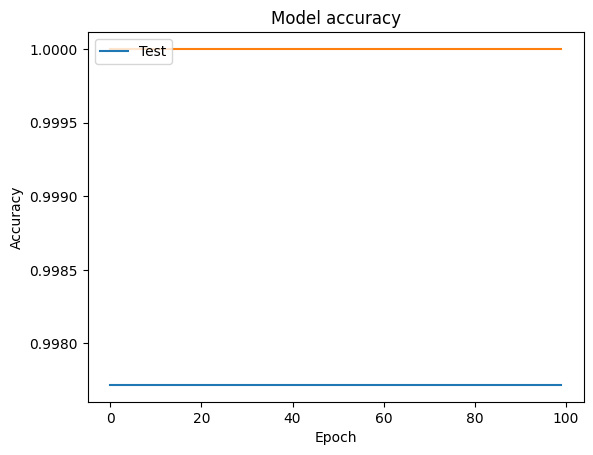

In [177]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([ 'Test'], loc='upper left')
plt.show()

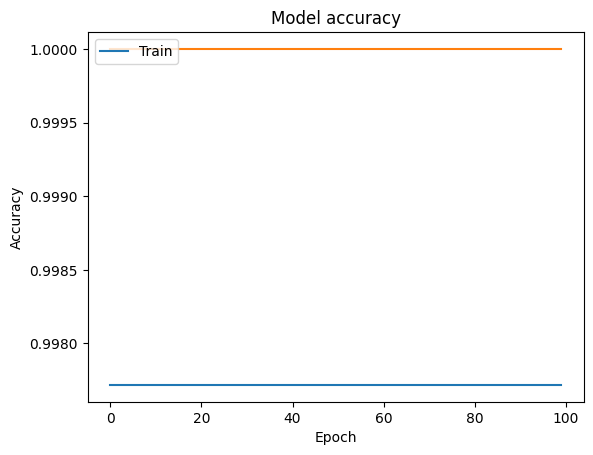

In [178]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

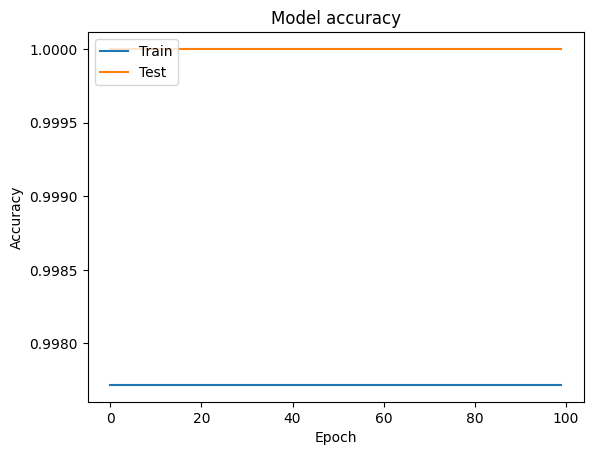

In [179]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

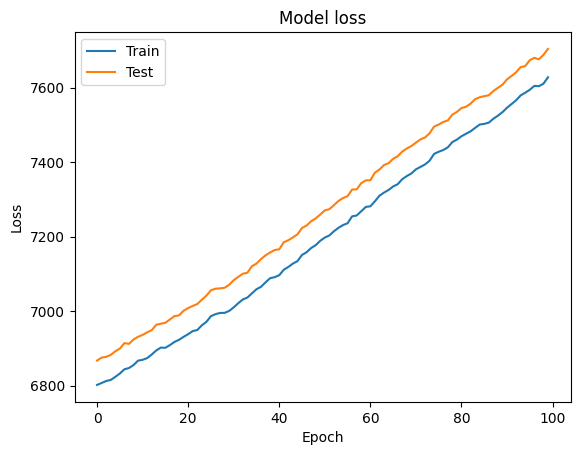

In [180]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()